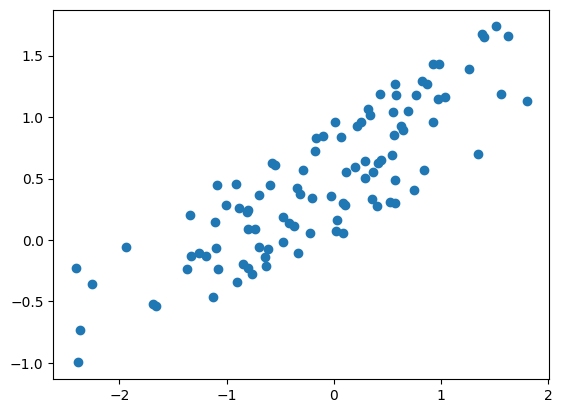

[[ 0.09565073]
 [-0.30484246]]


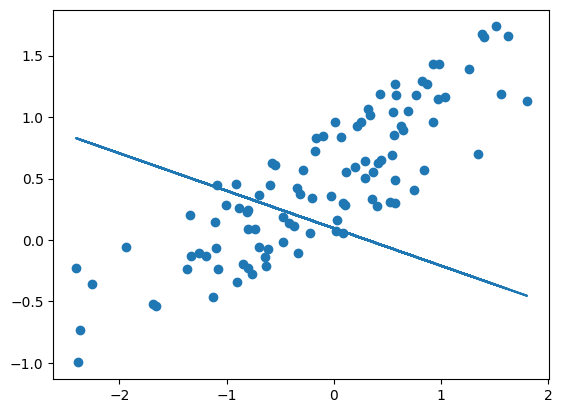

Initial Cost 0.4056281849041006
Theta [[0.40122471]
 [0.29950857]]


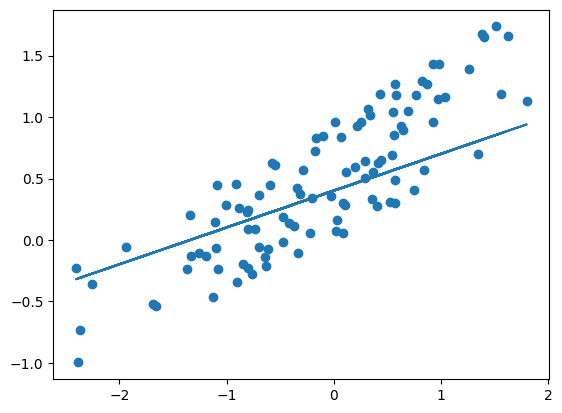

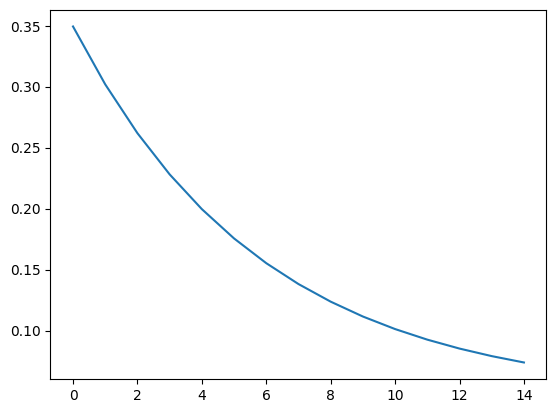

In [29]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(100)
Y = np.random.rand(100) + 0.5 * X
X = X.reshape(100, 1)
Y = Y.reshape(100, 1)

plt.scatter(X, Y)
plt.show()

# Initialize the weights
theta = np.random.randn(2)
theta = theta.reshape(2, 1)
print(theta)

# Add a column of ones to the input
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Define the model
def model(x, theta):
    return x.dot(theta)

initial_results = model(X, theta)
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], initial_results)
plt.show()

# Define the cost function
def cost_function(X, Y, theta):
    m = len(Y)
    return 1 / (2 * m) * np.sum((model(X, theta) - Y) ** 2)

print("Initial Cost", cost_function(X, Y, theta))

# Define the gradient function
def gradient(X, Y, theta):
    return  X.T.dot(model(X, theta) - Y)

# Define the gradient descent function
def gradient_descent(X, Y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, Y, theta)
        cost_history[i] = cost_function(X, Y, theta)
    return theta, cost_history

n_iterations = 15
alpha = 0.001
theta, cost_history = gradient_descent(X, Y, theta, alpha, n_iterations)
print("Theta", theta)

plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], model(X, theta))
plt.show()

plt.plot(range(n_iterations), cost_history)
plt.show()

In [30]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Theta from sklearn [[0.53297668 0.52813304]]


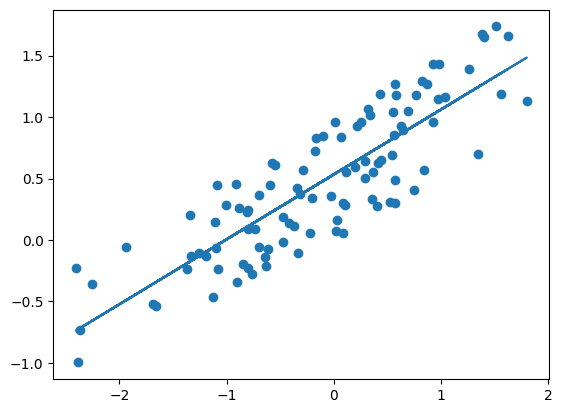

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, Y)
print("Theta from sklearn", model.coef_)

plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], model.predict(X))
plt.show()